# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [120]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [121]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [122]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [123]:
# Shape
df_dsa.shape

(9700, 11)

In [124]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [125]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [126]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [127]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [128]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [129]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [130]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [131]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [230]:
office = df_dsa[df_dsa['Categoria'] == 'Office Supplies']
group = office.groupby(['Cidade', 'Categoria']).agg('sum')
group['Valor_Venda'].nlargest(1)

Cidade         Categoria      
New York City  Office Supplies    68362.814
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

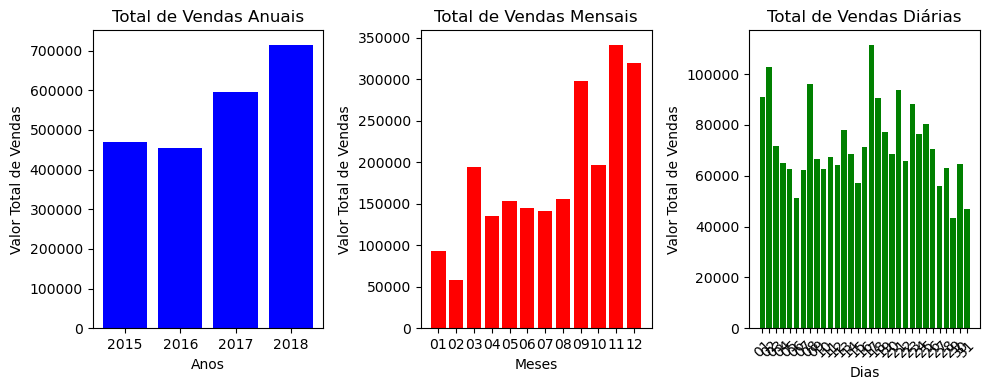

In [119]:
#separando cols que irei utilizar
df2 = df_dsa.filter(items=['Data_Pedido','Valor_Venda'])

#listas para armazenar data split
dia, mes, ano = [], [], []

lista_data = df2['Data_Pedido'].str.split('/')

for i, sublist in enumerate(lista_data):
    for j, v in enumerate(sublist):
        if j == 0:
            dia.append(v)
        elif j == 1:
            mes.append(v)
        else:
            ano.append(v)

df2['dia'] = dia
df2['mes'] = mes
df2['ano'] = ano

#Agrupando os dados por data
agrupadosAno  = df2.groupby('ano')
somaVendasAno = agrupadosAno['Valor_Venda'].sum()

agrupadosMes  = df2.groupby('mes')
somaVendasMes = agrupadosMes['Valor_Venda'].sum()

agrupadosDia  = df2.groupby('dia')
somaVendasDia = agrupadosDia['Valor_Venda'].sum()

# Dividindo o gráfico em 2 subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
            
axes[0].bar(somaVendasAno.index, somaVendasAno.values, label='barras', color='blue')
axes[0].set_xlabel('Anos')
axes[0].set_ylabel('Valor Total de Vendas')
axes[0].set_title('Total de Vendas Anuais')

axes[1].bar(somaVendasMes.index, somaVendasMes.values, label='barras', color='red')
axes[1].set_xlabel('Meses')
axes[1].set_ylabel('Valor Total de Vendas')
axes[1].set_title('Total de Vendas Mensais')

axes[2].bar(somaVendasDia.index, somaVendasDia.values, label='barras', color='green')
axes[2].set_xlabel('Dias')
axes[2].set_ylabel('Valor Total de Vendas')
axes[2].set_title('Total de Vendas Diárias')

plt.xticks(rotation=45)

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo os gráficos
plt.show()


## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

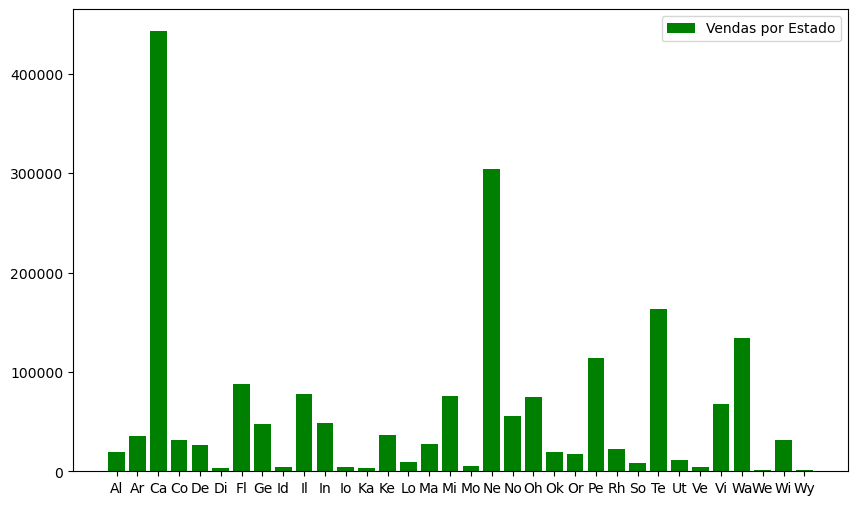

In [16]:
#separando cols que irei utilizar
df2 = df_dsa.filter(items=['Estado','Valor_Venda'])

#Agrupando os dados por estado
estadosAgrupados = df2.groupby('Estado')
vendaEstados = estadosAgrupados['Valor_Venda'].sum()

porInicial = vendaEstados[vendaEstados.index.str.startswith(('A', 'B', 'C'), na=False)]

plt.figure(figsize=(10, 6))  # Aumentando o tamanho da figura

plt.bar(vendaEstados.index.str.slice(0,2), vendaEstados.values, label = 'Vendas por Estado', color='green')
plt.xlabel = ('Estados')
plt.ylabel = ('Total de Vendas por Estado')
plt.title = ('Vendas por Estado')
plt.legend()
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

Cidade
New York City    251749.2190
Los Angeles      171654.6330
Seattle          114725.4780
San Francisco    107489.9520
Philadelphia     107197.8030
Houston           61590.1868
San Diego         47458.3790
Chicago           46974.3430
Jacksonville      44713.1830
Detroit           42446.9440
Name: Valor_Venda, dtype: float64


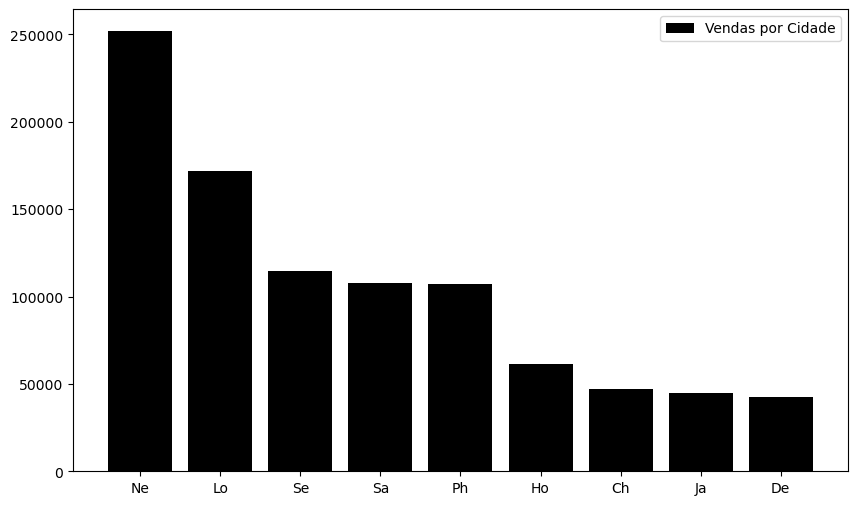

In [135]:
#separando cols que irei utilizar
df2 = df_dsa.filter(items=['Cidade','Valor_Venda'])

#Agrupando os dados por estado
cidadesAgrupadas = df2.groupby('Cidade')
vendaCidades = cidadesAgrupadas['Valor_Venda'].sum()

# Obtendo as 10 maiores vendas
maiores_vendas = vendaCidades.nlargest(10)

print(maiores_vendas)

plt.figure(figsize=(10, 6))  # Aumentando o tamanho da figura

plt.bar(maiores_vendas.index.str.slice(0,2), maiores_vendas.values, label = 'Vendas por Cidade', color='black')
plt.xlabel = ('Cidades')
plt.ylabel = ('Vendas por Cidade')
plt.title = ('As 10 Cidades com Maior Total de Vendas')
plt.legend()
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

Segmento
Consumer       1.133834e+06
Corporate      6.792322e+05
Home Office    4.224914e+05
Name: Valor_Venda, dtype: float64


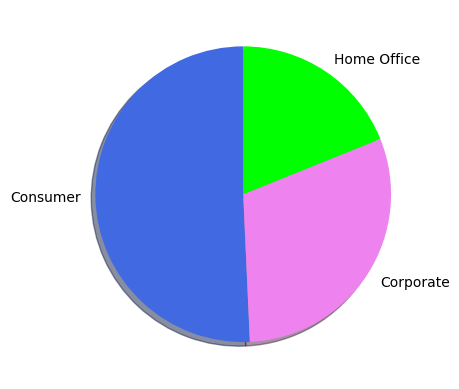

In [18]:
#separando cols que irei utilizar
df2 = df_dsa.filter(items=['Segmento','Valor_Venda'])

#Agrupando os dados por estado
segmentos = df2.groupby('Segmento')
vendasSegmentos = segmentos['Valor_Venda'].sum()

fatias = vendasSegmentos.values
titulos = vendasSegmentos.index
cores = ['royalblue', 'violet', 'lime']

print(vendasSegmentos)

plt.pie(fatias, labels=titulos, colors=cores, startangle=90, shadow=True)
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [19]:
#separando cols que irei utilizar
df2 = df_dsa.filter(items=['Segmento','Valor_Venda', 'Data_Pedido'])

#listas para armazenar data split
ano = []

lista_data = df2['Data_Pedido'].str.split('/')

for i, sublist in enumerate(lista_data):
    for j, v in enumerate(sublist):
        if j == 2:
            ano.append(v)

df2['ano'] = ano

grouped = df2.groupby(['Segmento', 'ano'])

# Calculando a soma
somaVenda = grouped['Valor_Venda'].sum()
somaVenda

Segmento     ano 
Consumer     2015    256719.9166
             2016    265295.2593
             2017    288459.5572
             2018    323359.6019
Corporate    2015    125819.5957
             2016    114643.1229
             2017    203266.7398
             2018    235502.7284
Home Office  2015     88229.0878
             2016     74134.1332
             2017    103639.6270
             2018    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [25]:
#separando cols que irei utilizar
df2 = df_dsa.filter(items=['Valor_Venda'])
desconto15 = df2.query('Valor_Venda > 1000').count()
print('O número de vendas com desconto de 15% seriam:', desconto15.values)

O número de vendas com desconto de 15% seriam: [457]


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [57]:
#separando cols que irei utilizar
media_sem_desc = df_dsa['Valor_Venda'].mean()

comDesconto = []

for v in df_dsa['Valor_Venda']:
    #print(v)
    if (v > 1000):
        novoValor = v - (v * 0.15)
        comDesconto.append(novoValor)
    else:
        comDesconto.append(v)
        
df_dsa['comDesc'] = comDesconto
media_com_desc = df_dsa['comDesc'].mean()

print('Antes do desconto:', round(media_sem_desc, 2))
print('Depois do desconto:', round(media_com_desc, 2))

Antes do desconto: 230.47
Depois do desconto: 215.51


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

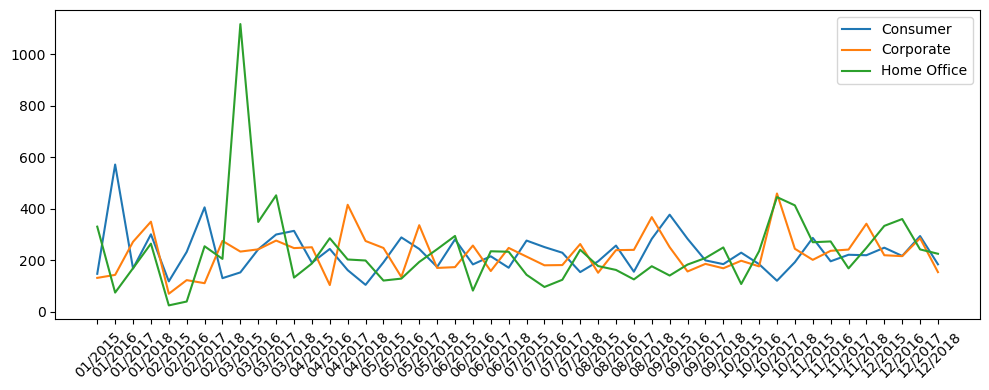

In [114]:
#separando cols que irei utilizar
df2 = df_dsa.filter(items=['Valor_Venda', 'Segmento', 'Data_Pedido'])

#listas para armazenar data split
dia, mes, ano = [], [], []

lista_data = df2['Data_Pedido'].str.split('/')

for i, sublist in enumerate(lista_data):
    for j, v in enumerate(sublist):
        if j == 0:
            dia.append(v)
        elif j == 1:
            mes.append(v)
        else:
            ano.append(v)

df2['dia'] = dia
df2['mes'] = mes
df2['ano'] = ano

grouped = df2.groupby(['Segmento', 'mes', 'ano'])
somaVenda = grouped['Valor_Venda'].mean()

# Preparando os dados para o gráfico
segmentos = df2['Segmento'].unique()

# Visualização
fig, axes = plt.subplots(1, 1, figsize=(10, 4))

# Criando o gráfico de linha para cada segmento
for segmento in segmentos:
    dados_segmento = somaVenda[segmento]
    meses_ano = [f'{mes}/{ano}' for mes, ano in dados_segmento.index]

    plt.plot(meses_ano, dados_segmento.values, label=segmento)
    
#Legenda
plt.legend()
plt.xticks(rotation=45)
    
# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo os gráficos
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

TypeError: __init__() got an unexpected keyword argument 'ncols'

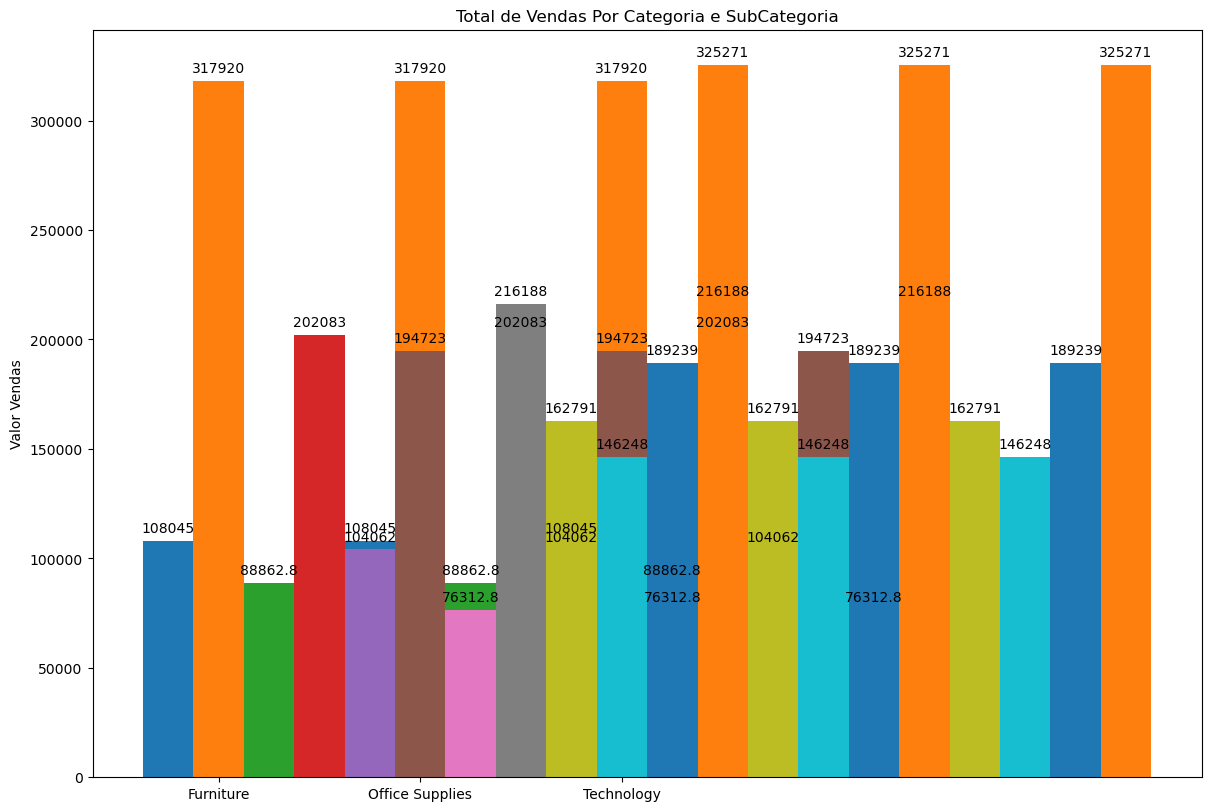

In [212]:
# Separando as colunas que irei utilizar
df2 = df_dsa.filter(items=['Valor_Venda', 'Categoria', 'SubCategoria'])

# Agrupando os dados
agrupados = df2.groupby(['Categoria', 'SubCategoria'])
somaAgrupados = agrupados['Valor_Venda'].sum().nlargest(12)

# Ordenando o objeto somaAgrupados por categorias
somaAgrupados = somaAgrupados.sort_index(level='Categoria')

# Dicionário para armazenar as categorias únicas
categorias = {}

width = 0.25  # the width of the bars
multiplier = 0

#fig, axes = plt.subplots(1, 1, figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8), layout='constrained')

# Iterando sobre somaAgrupados e obtendo nomes de índice e valores
for index, value in somaAgrupados.items():
    categoria = index[0]

    # Se a categoria ainda não estiver no dicionário, imprime o cabeçalho
    if categoria not in categorias:
        categorias[categoria] = True

x = np.arange(len(categorias))  # the label locations

# Iterando plot
for index, value in somaAgrupados.items():
    subcategoria = index[1]
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=subcategoria)
    ax.bar_label(rects, padding=4)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Valor Vendas')
ax.set_title('Total de Vendas Por Categoria e SubCategoria')
ax.set_xticks(x + width, categorias)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 250)

plt.show()

# Fim